# Data Analysis on Lok Sabha Election# 

In [1]:
#Loading required libraries and making a data frame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
df = pd.read_csv('lok_sabha_data.csv')

Data Cleaning and Preparation

In [2]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Party                      0
Constituency               0
Parliament Constituency    0
Winning Candidate          0
Total Votes                0
Margin                     0
dtype: int64


In [3]:
#We checked for missing values but there are no missing values found in the data so no need for data cleaning

EDA

In [4]:
print("First few rows of the DataFrame:")
print(df.head())
print()

First few rows of the DataFrame:
            Party  Constituency Parliament Constituency  \
0  Andhra Pradesh  Telugu Desam           Srikakulam(2)   
1  Andhra Pradesh  Telugu Desam         Vizianagaram(3)   
2  Andhra Pradesh  Telugu Desam        Visakhapatnam(4)   
3  Andhra Pradesh  Telugu Desam      Amalapuram (SC)(7)   
4  Andhra Pradesh  Telugu Desam               Eluru(10)   

          Winning Candidate Total Votes  Margin  
0  KINJARAPU RAMMOHAN NAIDU      754328  327901  
1     APPALANAIDU KALISETTI      743113  249351  
2     SRIBHARAT MATHUKUMILI      907467  504247  
3     G M HARISH (BALAYOGI)      796981  342196  
4        PUTTA MAHESH KUMAR      746351  181857  



In [5]:
df.shape

(544, 6)

In [6]:
#there are 544 rows and 6 columns in this data set.

In [7]:
df.describe()


,Party,Constituency,Parliament Constituency,Winning Candidate,Total Votes,Margin
count,544,544,544,544,544,544
unique,36,45,543,542,542,543
top,Uttar Pradesh,Bharatiya Janata Party,Bathinda(11),RAHUL GANDHI,692832,49656
freq,80,238,2,2,2,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Party                    544 non-null    object
 1   Constituency             544 non-null    object
 2   Parliament Constituency  544 non-null    object
 3   Winning Candidate        544 non-null    object
 4   Total Votes              544 non-null    object
 5   Margin                   544 non-null    object
dtypes: object(6)
memory usage: 25.6+ KB


In [9]:
#There are 36 unique parties represented in the election.
#The dataset includes 45 unique constituencies.
#There are 543 unique parliament constituencies. 
#There are 542 unique winning candidates. 
#The most frequently occurring total votes count is 692832
#The margin of victory has a top frequency of 2, appearing twice with the same value.
#The most frequent party is Bharatiya Janata Party, with 238 entries. 
#RAHUL GANDHI is the most frequent winning candidate, appearing twice. 
#Uttar Pradesh is the state with the highest frequency, appearing 80 times.

In [10]:
total_votes_stats = df['Total Votes'].describe()
total_votes_mode = df['Total Votes'].mode()[0]
print("Total Votes Statistics")
print(total_votes_stats )
print(f"Mode: {total_votes_mode}")


Total Votes Statistics
count        544
unique       542
top       692832
freq           2
Name: Total Votes, dtype: object
Mode: 376558


Constituency-Level Insights:

In [ ]:
#The constituency with the highest voter turnout recorded a total of 1,471,885 votes.
#This constituency is associated with the Indian National Congress.

In [11]:
margin_stats = df['Margin'].describe()
margin_mode = df['Margin'].mode()[0]
print("\nMargin Statistics")
print(margin_stats)
print(f"Mode: {margin_mode}")


Margin Statistics
count       544
unique      543
top       49656
freq          2
Name: Margin, dtype: object
Mode: 49656


In [14]:
df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

# Identify constituencies with the highest voter turnout
highest_voter_turnout = df.loc[df['Total Votes'].idxmax()]
# Displaying the results
print("Constituency with the Highest Voter Turnout:")
print(highest_voter_turnout[['Constituency', 'Total Votes']])

Constituency with the Highest Voter Turnout:
Constituency    Indian National Congress
Total Votes                    1471885.0
Name: 37, dtype: object


In [15]:
# Identify constituencies with the lowest voter turnout
lowest_voter_turnout = df.loc[df['Total Votes'].idxmin()]
print("\nConstituency with the Lowest Voter Turnout:")
print(lowest_voter_turnout[['Constituency', 'Total Votes']])



Constituency with the Lowest Voter Turnout:
Constituency    Indian National Congress
Total Votes                      25726.0
Name: 206, dtype: object


In [16]:
#   with the largest winning margins
largest_margin = df.loc[df['Margin'].idxmax()]
print("\nConstituency with the Largest Winning Margin:")
print(largest_margin[['Constituency', 'Margin']])


Constituency with the Largest Winning Margin:
Constituency    Bharatiya Janata Party
Margin                       1175092.0
Name: 232, dtype: object


In [17]:
# Constituencies with the smallest winning margins
smallest_margin = df.loc[df['Margin'].idxmin()]
print("\nConstituency with the Smallest Winning Margin:")
print(smallest_margin[['Constituency', 'Margin']])


Constituency with the Smallest Winning Margin:
Constituency    Shiv Sena
Margin               48.0
Name: 279, dtype: object


Winning Candidate Characteristic

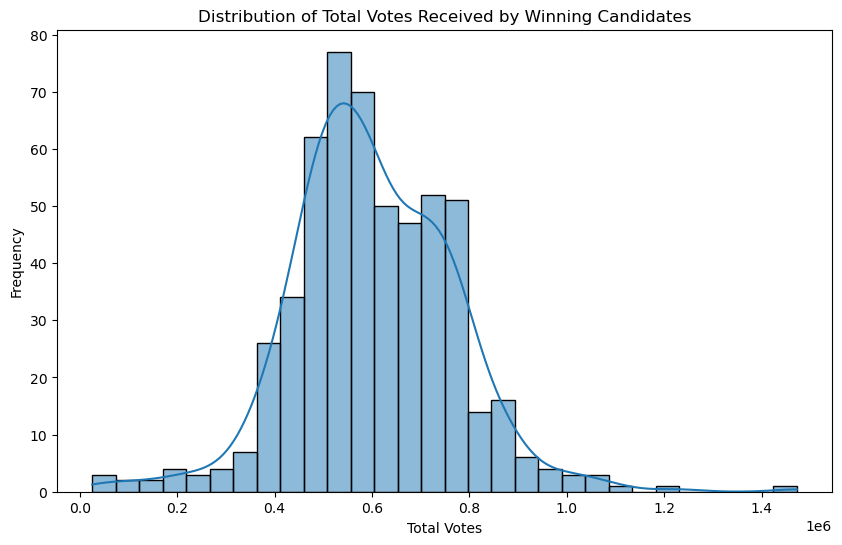

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Votes'].dropna(), kde=True, bins=30)
plt.title('Distribution of Total Votes Received by Winning Candidates')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Summary statistics for total votes
total_votes_summary = df['Total Votes'].describe()
print("Summary Statistics for Total Votes:")
print(total_votes_summary)

Summary Statistics for Total Votes:
count    5.430000e+02
mean     6.017980e+05
std      1.667866e+05
min      2.572600e+04
25%      4.990795e+05
50%      5.860440e+05
75%      7.156405e+05
max      1.471885e+06
Name: Total Votes, dtype: float64


In [22]:
# Investigate patterns or trends related to winning candidates by party
party_votes_summary = df.groupby('Party')['Total Votes'].agg(['mean', 'min', 'max', 'count']).reset_index()
print("\nSummary of Total Votes by Party:")
print(party_votes_summary)


Summary of Total Votes by Party:
                                   Party           mean       min        max  \
0            Andaman and Nicobar Islands  102436.000000  102436.0   102436.0   
1                         Andhra Pradesh  729684.280000  477005.0   907467.0   
2                      Arunachal Pradesh  175499.000000  145581.0   205417.0   
3                                  Assam  763337.214286  334620.0  1471885.0   
4                                  Bihar  529726.350000  380581.0   649331.0   
5                             Chandigarh  216657.000000  216657.0   216657.0   
6                           Chhattisgarh  724852.636364  458398.0  1050351.0   
7   Dadra & Nagar Haveli and Daman & Diu   81798.500000   42523.0   121074.0   
8                                    Goa  237581.000000  217836.0   257326.0   
9                                Gujarat  720814.240000  580872.0  1031065.0   
10                               Haryana  676719.300000  542175.0   808336.0   
11    

In [ ]:
#Mean Total Votes: The average number of total votes received by winning candidates is approximately 601,798.
#Standard Deviation: There is a substantial variation in total votes, with a standard deviation of around 166,787.
#Range: The votes range from a minimum of 25,726 to a maximum of 1,471,885, indicating significant variability in voter turnout across constituencies.
#Median (50%): The median total votes is 586,044, which is slightly lower than the mean, indicating a right-skewed distribution.

In [25]:
# Identifying parties with consistently high or low votes
high_vote_parties = party_votes_summary[party_votes_summary['mean'] > total_votes_summary['mean']]
low_vote_parties = party_votes_summary[party_votes_summary['mean'] < total_votes_summary['mean']]

print("\nParties with Consistently High Total Votes:")
print(high_vote_parties)

print("\nParties with Consistently Low Total Votes:")
print(low_vote_parties)


Parties with Consistently High Total Votes:
             Party           mean       min        max  count
1   Andhra Pradesh  729684.280000  477005.0   907467.0     25
3            Assam  763337.214286  334620.0  1471885.0     14
6     Chhattisgarh  724852.636364  458398.0  1050351.0     11
9          Gujarat  720814.240000  580872.0  1031065.0     25
10         Haryana  676719.300000  542175.0   808336.0     10
13       Jharkhand  627938.214286  451139.0   791657.0     14
14       Karnataka  742230.535714  633059.0  1079002.0     28
18  Madhya Pradesh  775546.586207  459728.0  1226751.0     29
23    NCT OF Delhi  694417.714286  453185.0   866483.0      7
28       Rajasthan  709436.480000  530011.0   888202.0     25
31       Telangana  618061.000000  465072.0   991042.0     17
32         Tripura  829394.000000  777447.0   881341.0      2
35     West Bengal  686933.166667  454696.0  1048230.0     42

Parties with Consistently Low Total Votes:
                                   Party   

In [26]:
#Parties with Consistently High Total Votes:
#Andhra Pradesh, Assam, Chhattisgarh, Gujarat, Haryana, Jharkhand, Karnataka, Madhya Pradesh, NCT of Delhi, Rajasthan, Telangana, Tripura, and West Bengal show consistently high average total votes. This suggests strong voter turnout and engagement in these states.
#Tripura has the highest average total votes at 829,394, indicating a highly engaged electorate.

#Parties with Consistently Low Total Votes:
#Andaman and Nicobar Islands, Arunachal Pradesh, Bihar, Chandigarh, Dadra & Nagar Haveli and Daman & Diu, Goa, Himachal Pradesh, Jammu and Kashmir, Kerala, Ladakh, Lakshadweep, Maharashtra, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Puducherry, Punjab, Sikkim, Tamil Nadu, Uttar Pradesh, and Uttarakhand have lower average total votes compared to other states.
#Lakshadweep has the lowest average total votes at 25,726, indicating lower voter engagement or a smaller electorate.

Margin Analysis

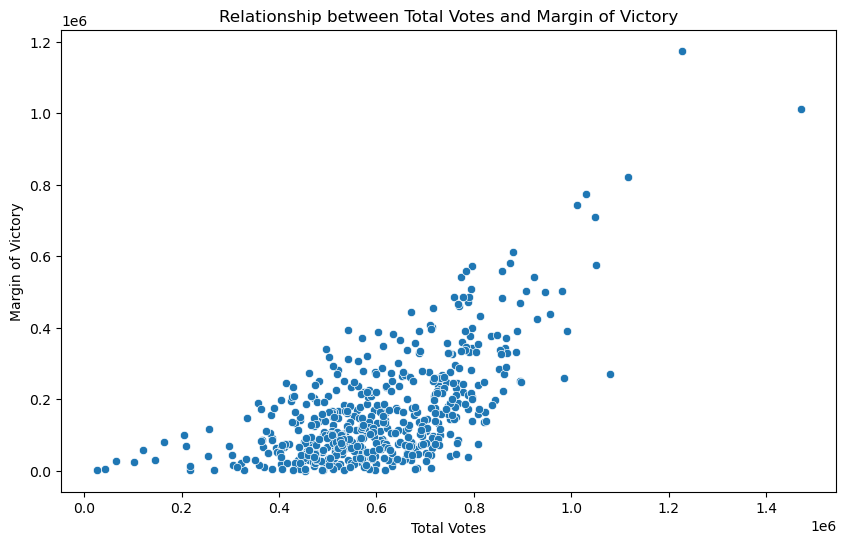

In [27]:
# Examine the relationship between total votes and margin of victory
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Votes', y='Margin', data=df)
plt.title('Relationship between Total Votes and Margin of Victory')
plt.xlabel('Total Votes')
plt.ylabel('Margin of Victory')
plt.show()

In [28]:
# Calculate correlation coefficient
correlation = df['Total Votes'].corr(df['Margin'])
print(f"Correlation Coefficient between Total Votes and Margin of Victory: {correlation}")

Correlation Coefficient between Total Votes and Margin of Victory: 0.6587792735001095


In [ ]:
#The correlation coefficient of approximately 0.659 indicates a moderately strong positive correlation between total votes received and margin of victory.
#Insight: This suggests that in general, constituencies with higher voter turnout tend to have wider margins of victory.
#It implies that when voter participation increases, the winning candidate typically secures a larger margin over their competitors. 
#This correlation can vary depending on local political dynamics and voter behavior.

In [32]:
# Identify constituencies with exceptionally narrow margins
narrow_margin_constituencies = df[df['Margin'] == df['Margin'].min()]
# Display the constituencies with narrow margins
print("\nConstituencies with Exceptionally Narrow Margins:")
print(narrow_margin_constituencies[['Constituency', 'Margin']])


Constituencies with Exceptionally Narrow Margins:
    Constituency  Margin
279    Shiv Sena    48.0


In [33]:
#Insight: The constituency where Shiv Sena won with a margin of only 48 votes highlights a highly competitive race.
#Implications: Such narrow margins indicate that voter preferences in this constituency are closely divided between Shiv Sena and its competitors.
#It suggests that small shifts in voter turnout or preferences could significantly alter election outcomes in future elections.

Parliament Constituency Insights

In [34]:
# Group by Parliament Constituency and Party to summarize performance
constituency_summary = df.groupby(['Parliament Constituency', 'Party']).size().reset_index(name='Count')

# Identify dominant parties within each constituency
dominant_parties = constituency_summary.groupby('Parliament Constituency')['Count'].idxmax()
dominant_parties_summary = constituency_summary.loc[dominant_parties]

# Identify constituencies with diverse political representation
diverse_constituencies = constituency_summary.groupby('Parliament Constituency')['Party'].nunique()
diverse_constituencies = diverse_constituencies[diverse_constituencies > 1].index.tolist()

# Display summary
print("Summary of Party Performance within Parliament Constituencies:")
print(constituency_summary)

print("\nDominant Parties within Each Parliament Constituency:")
print(dominant_parties_summary)

print("\nParliament Constituencies with Diverse Political Representation:")
print(diverse_constituencies)Parliament Constituency Insights

Summary of Party Performance within Parliament Constituencies:
    Parliament Constituency              Party  Count
0                AJMER (13)          Rajasthan      1
1                  ALWAR(8)          Rajasthan      1
2                 AMBALA(1)            Haryana      1
3       ANANTNAG-RAJOURI(3)  Jammu and Kashmir      1
4              ARAKKONAM(7)         Tamil Nadu      1
..                      ...                ...    ...
538               Wardha(8)        Maharashtra      1
539              Wayanad(4)             Kerala      1
540           West Delhi(6)       NCT OF Delhi      1
541    Yavatmal- Washim(14)        Maharashtra      1
542            Zahirabad(5)          Telangana      1

[543 rows x 3 columns]

Dominant Parties within Each Parliament Constituency:
    Parliament Constituency              Party  Count
0                AJMER (13)          Rajasthan      1
1                  ALWAR(8)          Rajasthan      1
2                 AMBALA(1)            Haryana  

Visuvalizations

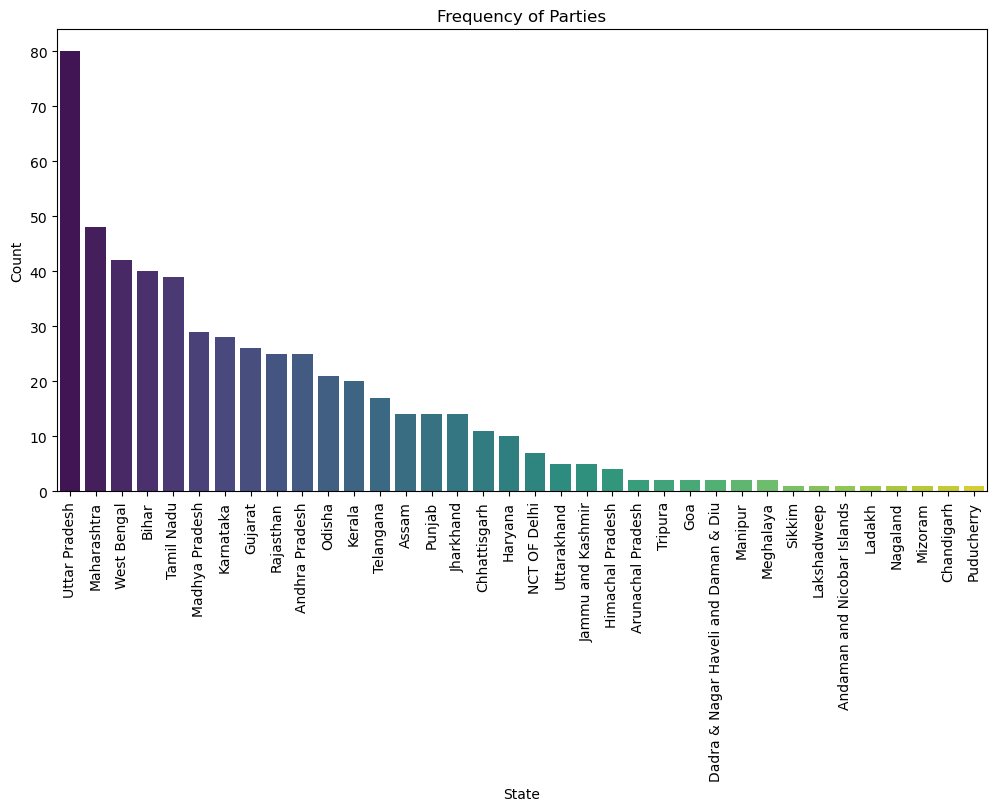

In [36]:
party_counts = df['Party'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=party_counts.index, y=party_counts.values, palette='viridis')
plt.title('Frequency of Parties')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [37]:
#From this we can say that UP has more seats and Puducherry lowest number of seats

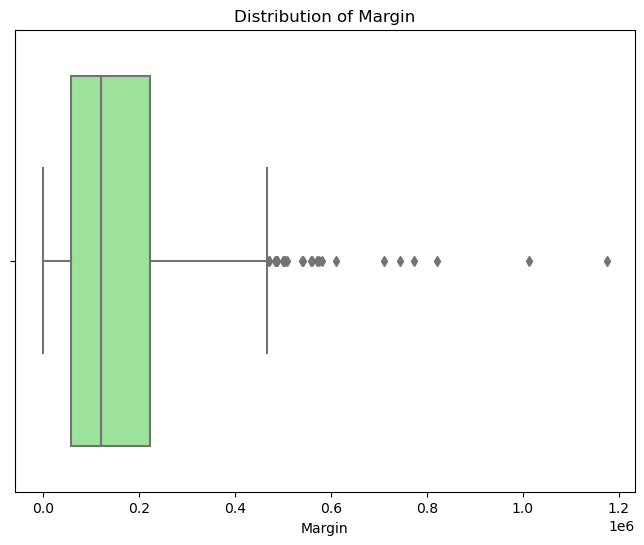

In [38]:
#Box PLot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Margin'], color='lightgreen')
plt.title('Distribution of Margin')
plt.xlabel('Margin')
plt.show()


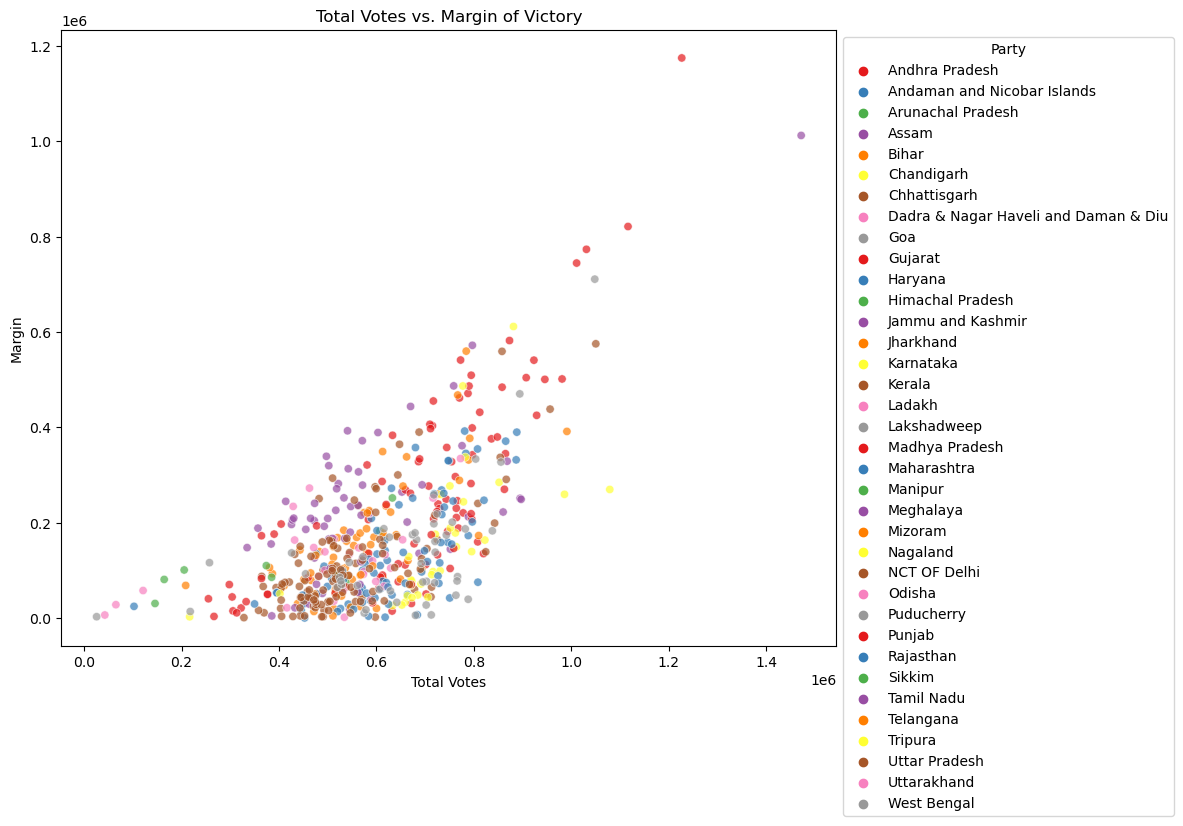

In [39]:
#Scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Total Votes', y='Margin', data=df, hue='Party', palette='Set1', alpha=0.7)
plt.title('Total Votes vs. Margin of Victory')
plt.xlabel('Total Votes')
plt.ylabel('Margin')
plt.legend(title='Party', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


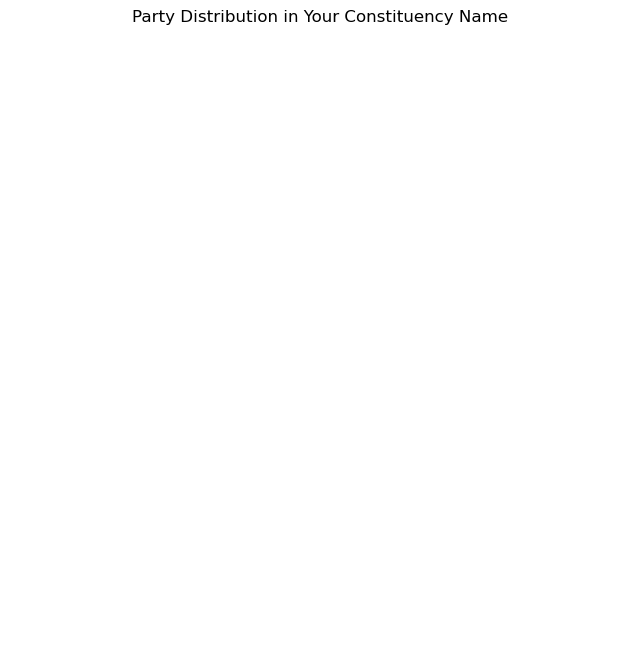

In [42]:
#Pie chart
constituency_name = 'Your Constituency Name'
party_distribution = df[df['Parliament Constituency'] == constituency_name]['Party'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(party_distribution, labels=party_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Party Distribution in {constituency_name}')
plt.axis('equal')
plt.show()


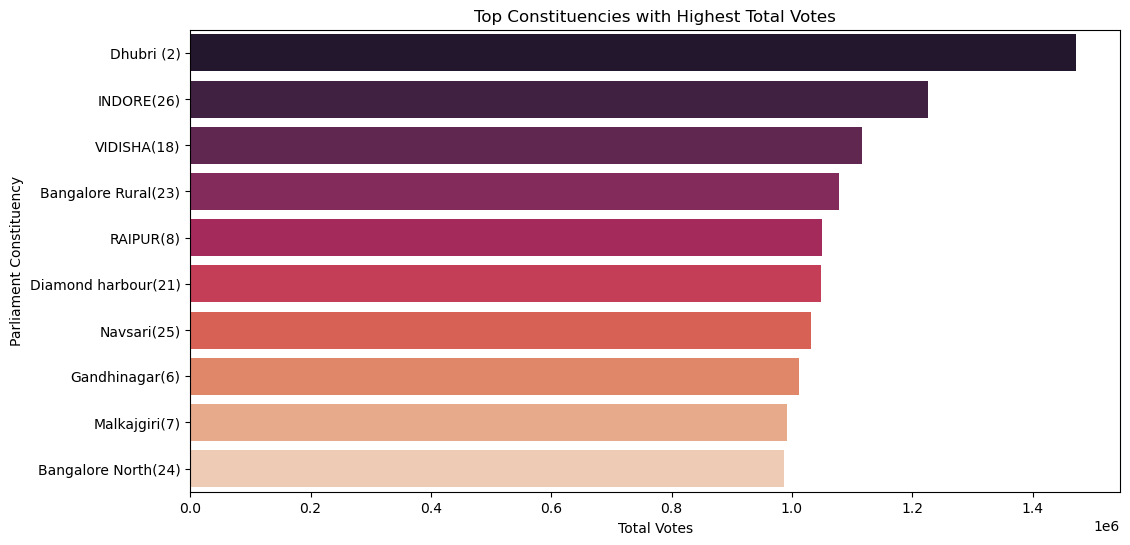

In [41]:
#Bar plot
top_constituencies = df.sort_values(by='Total Votes', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Total Votes', y='Parliament Constituency', data=top_constituencies, palette='rocket')
plt.title('Top Constituencies with Highest Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Parliament Constituency')
plt.show()


In [ ]:
#From this we can find that Dhubri has highest numbe of votes in constituencies